In [1]:
%matplotlib ipympl

In [2]:
import warnings

warnings.filterwarnings("ignore")

# PCA

## Is molecule density sparse?

In [3]:
import grad_dft as gd
import matplotlib.pyplot as plt
import numpy as np
from pyscf import dft, gto, tools
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
def create_density(mol):
    mean_field = dft.UKS(mol)
    ground_truth_energy = mean_field.kernel()

    # Then we can use the following function to generate the molecule object
    HF_molecule = gd.molecule_from_pyscf(mean_field)

    array = HF_molecule.density()
    return array

In [5]:
def plot_heatmap(array):
    plt.figure(figsize=(8, 4))
    plt.imshow(array, cmap="hot", aspect="auto")
    plt.colorbar()
    plt.title("Heatmap")
    plt.show()

In [6]:
def generate_cube(mol, fname):
    cube = tools.cubegen.Cube(mol)

    cube.write(field=cube.get_coords(), fname=fname)

converged SCF energy = -99.8206324520547  <S^2> = -8.8817842e-16  2S+1 = 1


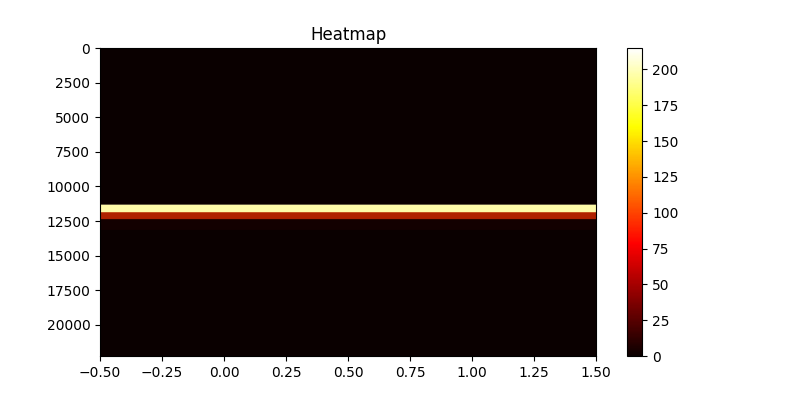

In [7]:
molecule = gto.M(atom=[["H", (0, 0, 0)], ["F", (0, 0, 1.1)]], basis="def2-tzvp")

electron_d1 = create_density(molecule)

plot_heatmap(electron_d1)

In [19]:
electron_d1.shape

(22248, 2)

In [39]:
22248 / 398

55.89949748743719

In [18]:
np.allclose(electron_d1[:, 0], electron_d1[:, 1])

True

In [9]:
plt.scatter(electron_d1[:, 0], electron_d1[:, 1], label="Original Data", alpha=0.7)

converged SCF energy = -1.11599939387619  <S^2> = -1.7763568e-15  2S+1 = 1


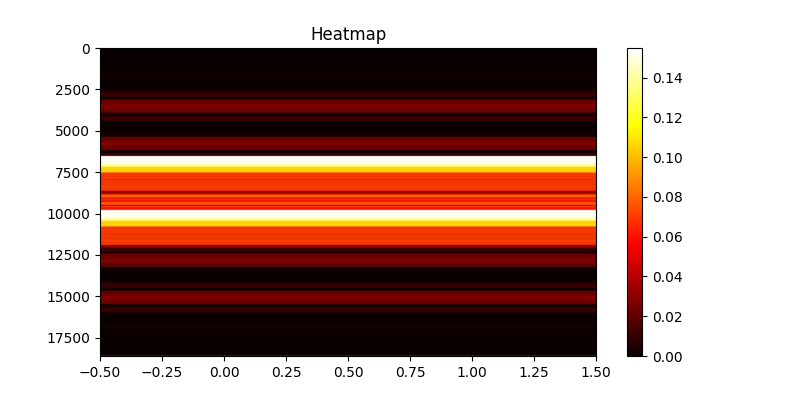

In [10]:
molecule = gto.M(
    atom=[["H", (0, 0, 0)], ["H", (0, 0, 1)]], basis="def2-tzvp", charge=0, spin=0
)
electron_d2 = create_density(molecule)
plot_heatmap(electron_d2)

In [11]:
plt.scatter(electron_d2[:, 0], electron_d2[:, 1], label="Original Data", alpha=0.7)

In [12]:
def pca(X, PCA_class):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    n_components = 1
    sparse_pca = PCA_class(n_components=n_components, random_state=42)
    X_sparse_pca = sparse_pca.fit_transform(X_scaled)
    return X_sparse_pca

In [13]:
(pca(electron_d1, SparsePCA) == pca(electron_d1, PCA)).all()

False

In [14]:
def _3d_plot(alpha_values):
    # Create a 3D grid of coordinates
    x, y, z = np.indices(alpha_values.shape)

    # Flatten the arrays for plotting
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    alpha_values = alpha_values.flatten()

    # Plot the points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with transparency
    sc = ax.scatter(x, y, z, c="b", alpha=alpha_values, marker="o")

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

In [15]:
def _3d_plot(alpha_values):
    # Create a 3D grid of coordinates
    x, y, z = np.indices(alpha_values.shape)

    # Flatten the arrays for plotting
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    alpha_values = alpha_values.flatten()

    # Plot the points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with transparency
    sc = ax.scatter(x, y, z, c="b", alpha=alpha_values, marker="o")

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()


def _slice_plot(volumetric_data):
    slice_data = volumetric_data[
        :,
        :,
        volumetric_data.shape[2] // 2,
    ]  # Mid-slice along z-axis

    # Create a contour plot of this slice
    plt.figure(figsize=(8, 6))
    plt.contourf(
        slice_data, levels=20, cmap="viridis"
    )  # Adjust 'levels' for more or fewer contour lines
    plt.colorbar()
    plt.title("Contour Plot of Cube Data")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

In [16]:
from ase.io import cube

with open("graddft_qnn/h2o_den.cube") as f:
    aa = cube.read_cube(f, read_data=True, program=None, verbose=False)
    _3d_plot(aa["data"] / aa["data"].max())

FileNotFoundError: [Errno 2] No such file or directory: 'graddft_qnn/h2o_den.cube'

In [ ]:
from ase.io import cube

with open("graddft_qnn/h2o_den.cube") as f:
    aa = cube.read_cube(f, read_data=True, program=None, verbose=False)
    _slice_plot(aa["data"])